<style>
.noborder td, .noborder th, .noborder table {
    border: none !important;
}
</style>

<table id="top" class="noborder" style="width:100%; border-collapse:collapse;">
  <tr>
    <td style="text-align:left; width:33%;">
    </td>
    <td style="text-align:center; width:33%;">01</td>
    <td style="text-align:right; width:33%;">
      <a href="./02_clustering.ipynb" title="Clustering">Next &gt;</a>
    </td>
  </tr>
</table>

# Spotify Recommendation System

## 01 Data Extraction, Cleaning and EDA

**Project:** Code Institute – Hackathon

---
### **Objectives**
- Load the house dataset from Kaggle: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset 
- Inspect structure, datatypes, and completeness.
- Handle missing values and remove duplicates.
- Handling outliers and anormalies 
- EDA & Statistical analysis
- Prepare the dataset for feature engineering and visualisation.

### **Inputs**
- `data/raw/spotify_dataset_raw.csv`

### **Outputs**
- `data/processed/cleaned_spotify_dataset.csv`
        
### **Additional Comments**
Confirm the spotify_dataset_raw.csv is exisit under data directory. Run this notebook top-down.

---

Import nesessary libraries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings 
# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

Set the home directory. Need to change the working directory from its current folder to its parent folder. Access the current directory with os.getcwd()

In [3]:
PROJECT_DIR = os.path.join(os.getcwd()) # Define the project root directory
os.chdir(PROJECT_DIR) # Change the current working directory
print("Working directory:", os.getcwd()) 

Working directory: c:\MyStuff\CodeInstitute\Projects\ci-hackathon-two\spotify-recommendation-system\jupyter_notebooks


Load the data from the original data set reside within data directory under data/raw/ directory. 

In [4]:
# LOAD DATASET
try:
    # Data directory paths
    data_path = os.path.join("..","data", "raw")
    # Extract the original dataset
    df_original = pd.read_csv(os.path.join(data_path, "spotify_dataset_raw.csv"))
    print("Dataset loaded successfully.")
except Exception as e:
    print(e)
    print("Error loading the dataset.")
    df_original = pd.DataFrame()  # Create an empty DataFrame if loading fails

print(f"Original dataset shape: {df_original.shape}")

Dataset loaded successfully.
Original dataset shape: (114000, 21)


---

### Understanding the Data - Initial Data Exploration
- Check the head
- Column names
- Data Types
- Duplicates
- Missing values

In [33]:
# Quick Look 
print("=== Quick look at five rows ===")
with pd.option_context('display.max_columns', None):
    print(df_original.head())

=== Quick look at five rows ===
   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again       

In [34]:
# What are the column name
print("=== What are the column name ===")
print(df_original.columns)

=== What are the column name ===
Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')


In [35]:
# Data Types and Non-Null Counts 
print(df_original.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [36]:
# Check for Duplicates
duplicates = df_original.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")
if duplicates > 0:
    df_original = df_original.drop_duplicates()
    print("Duplicates removed.")
else:
    print("No duplicates found.")


Duplicate Rows: 0
No duplicates found.


In [37]:
# Check for Missing Values
missing = df_original.isnull().sum()
if missing.sum() == 0:
    print("\nNo missing values found.")
else:
    print(f"\nMissing Values:\n{missing[missing > 0]}")


Missing Values:
artists       1
album_name    1
track_name    1
dtype: int64


### Findings & Recommendations:
- **Shape:** The dataset has 114,000 rows and 20 columns.
- **Missing Values:** `artists`, `album_name`, and `track_name` have 1 missing value each. Since this is negligible, we will drop these rows.

---

### Initial Data Cleaning

**Steps:**
Drop rows with missing metadata and make the dataset reliable for statistical testing.

In [5]:
print(f"Original Count: {len(df_original)}")

# 1. Drop Nulls
df_clean = df_original.dropna()

print(f"Cleaned NA: {len(df_clean)}")

print(f"Dropped: {len(df_original) - len(df_clean)} Row(S) with Null Values")

Original Count: 114000
Cleaned NA: 113999
Dropped: 1 Row(S) with Null Values


---

### Descriptive Statistics

In [17]:
# Descriptive Statistics
print("--- Numerical Data Summary ---")
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
ser_skew = df_original[numerical_cols].skew()
ser_skew.name = 'Skewness'

ser_kurt = df_clean[numerical_cols].kurtosis()
ser_kurt.name = 'Kurtosis'

SummaryStats = df_clean.describe(include='all')

# Append Skewness and Kurtosis to Summary Statistics
SummaryStats = pd.concat([SummaryStats, ser_skew.to_frame().T, ser_kurt.to_frame().T])
display(SummaryStats)

--- Numerical Data Summary ---


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
count,1.139990e+05,113999,113999,113999,113999,113999.000000,1.139990e+05,113999,113999.000000,113999.000000,...,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999
unique,NaN,89740,31437,46589,73608,NaN,NaN,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114
top,NaN,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,NaN,NaN,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,acoustic
freq,NaN,9,279,195,151,NaN,NaN,104252,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000
mean,5.699942e+04,NaN,NaN,NaN,NaN,33.238827,2.280312e+05,NaN,0.566801,0.641383,...,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034,NaN
std,3.290924e+04,NaN,NaN,NaN,NaN,22.304959,1.072961e+05,NaN,0.173543,0.251530,...,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623,NaN
min,0.000000e+00,NaN,NaN,NaN,NaN,0.000000,8.586000e+03,NaN,0.000000,0.000000,...,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2.849950e+04,NaN,NaN,NaN,NaN,17.000000,1.740660e+05,NaN,0.456000,0.472000,...,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000,NaN
50%,5.699900e+04,NaN,NaN,NaN,NaN,35.000000,2.129060e+05,NaN,0.580000,0.685000,...,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000,NaN
75%,8.549950e+04,NaN,NaN,NaN,NaN,50.000000,2.615060e+05,NaN,0.695000,0.854000,...,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000,NaN


### Key Findings from the Data:

**Duration (duration_ms):**
- Max: ~5.2 million ms (~87 minutes). This is likely a full podcast or DJ set, not a song.
- Min: ~ 8 s (or very close to it). This is an error.
- Action: We must filter songs to a reasonable range (e.g., 30s to 10 mins).

**Loudness:**
- Range: -49 dB to 4.5 dB. The positive value (4.5) could be unusual for digital audio and  could skewing the scaler., but possible with distortion. The min (-49) is effectively silence, but they are valid.
- Action: Further explore and decide

**Tempo:**
- Min: 0 BPM. This could be unusual for music. But could be due to the instruments in use. Still, It will mess up distance calculations (a song with 120 BPM will be "far" from a song with 0 BPM, even if the user likes both).
- Action: Further explore and decide

---

### Distribution & Outliers


**NOTE:**
- Python libraries (like Matplotlib/Seaborn) automatically switch to ie notation when numbers are too large to fit comfortably on the axis labels
- Duration_ms chart is in 1e6 is in notation for $1 \times 10^6$, which equals 1,000,000 (one million)

--- Visualizing Raw Data Distributions ---


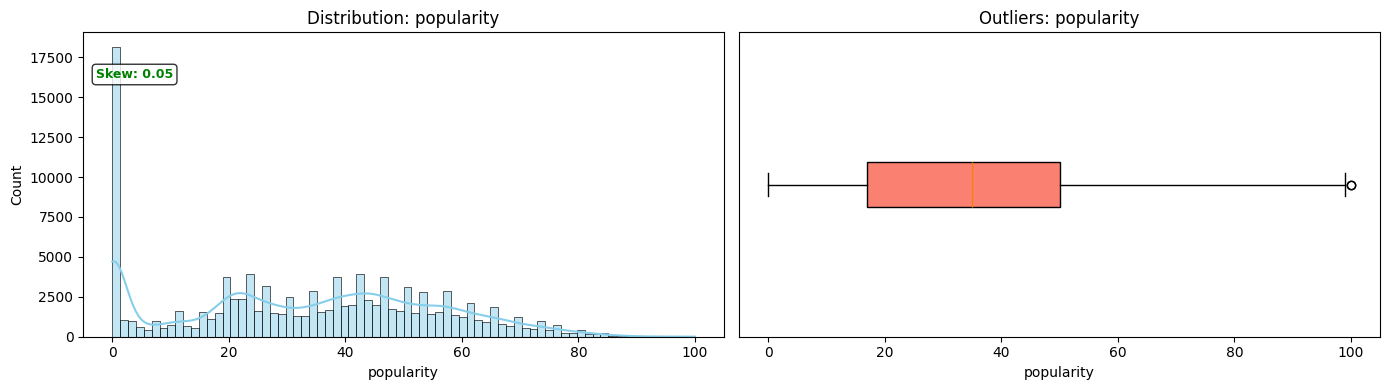

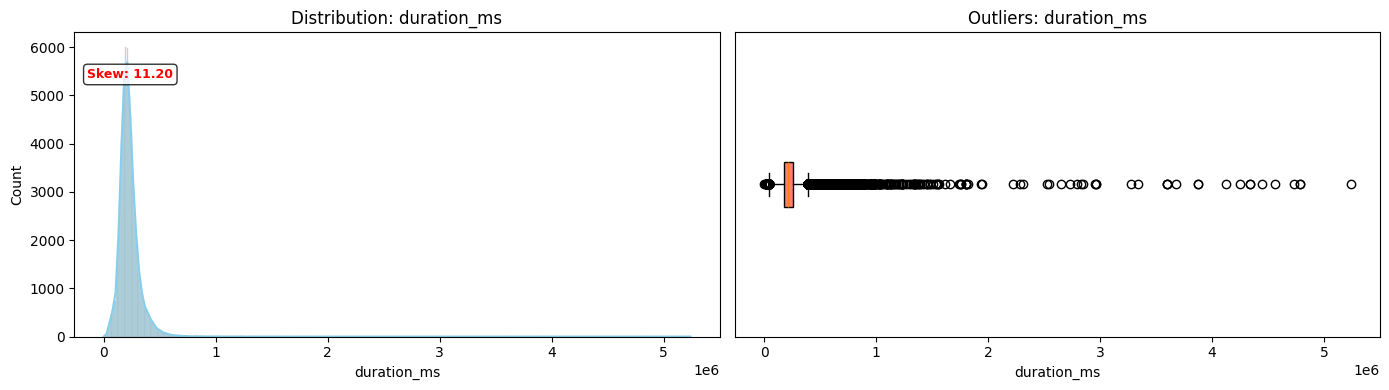

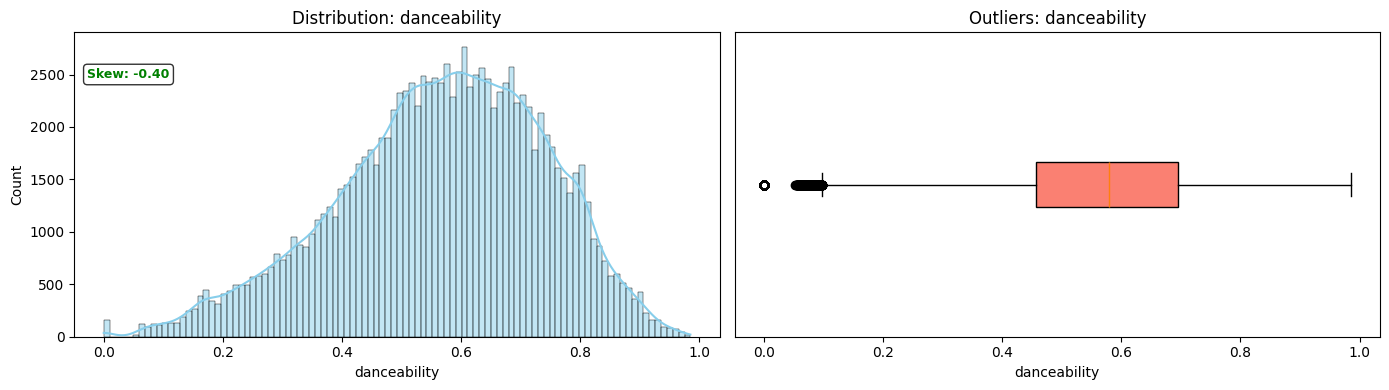

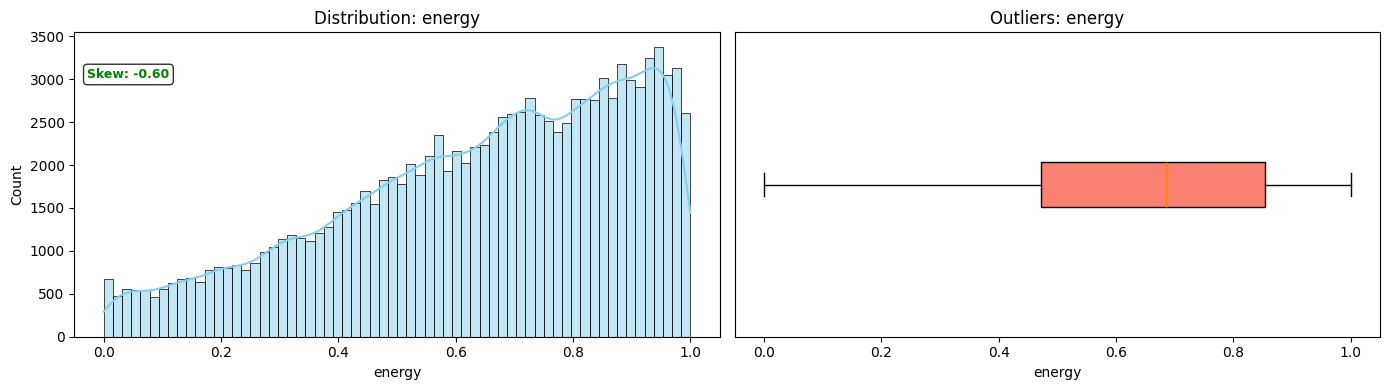

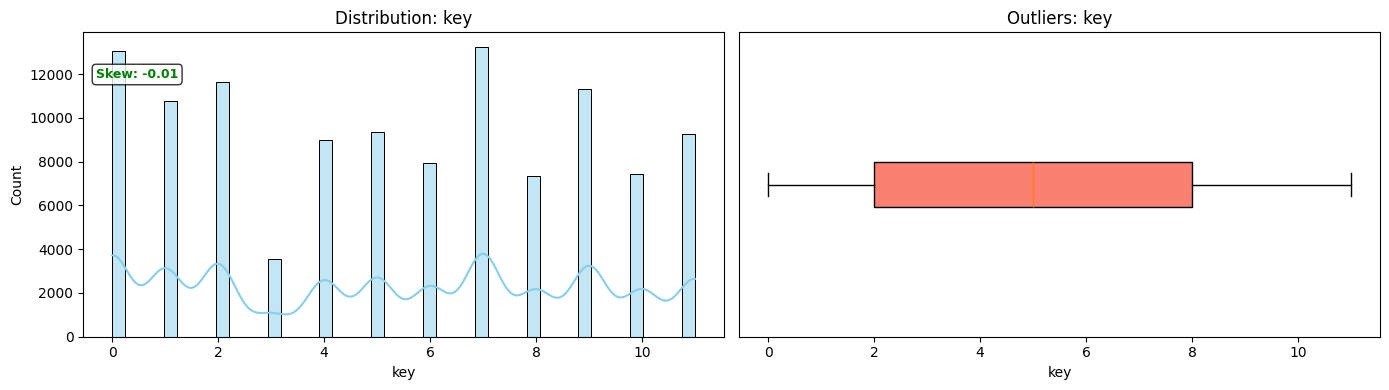

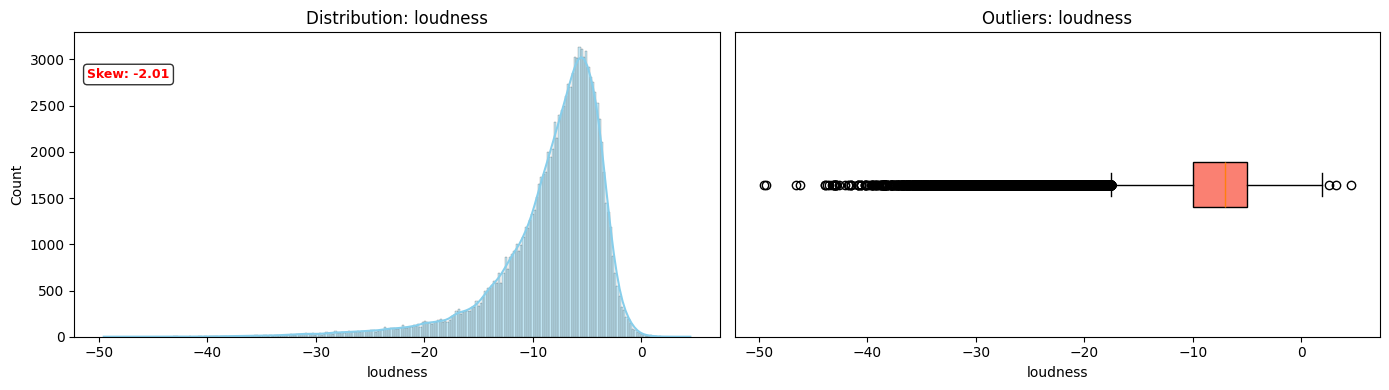

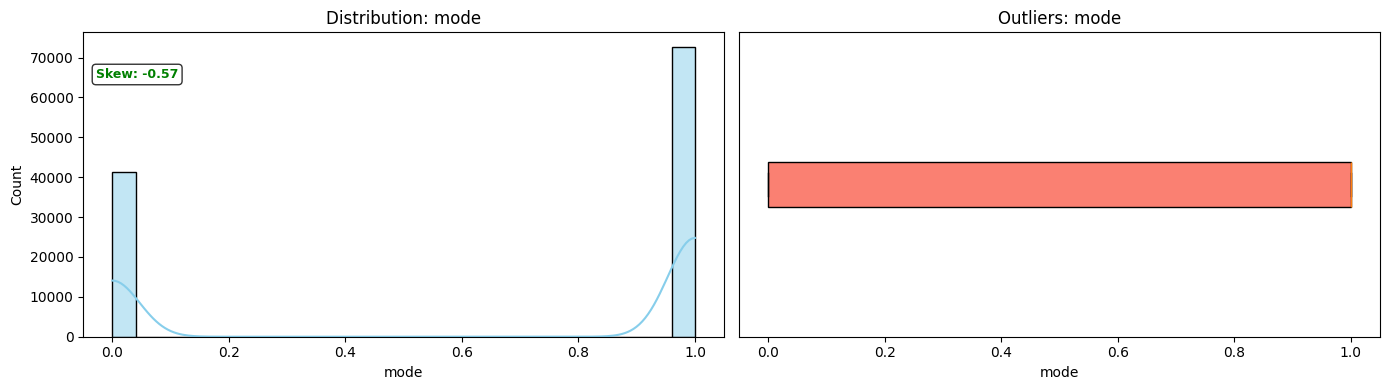

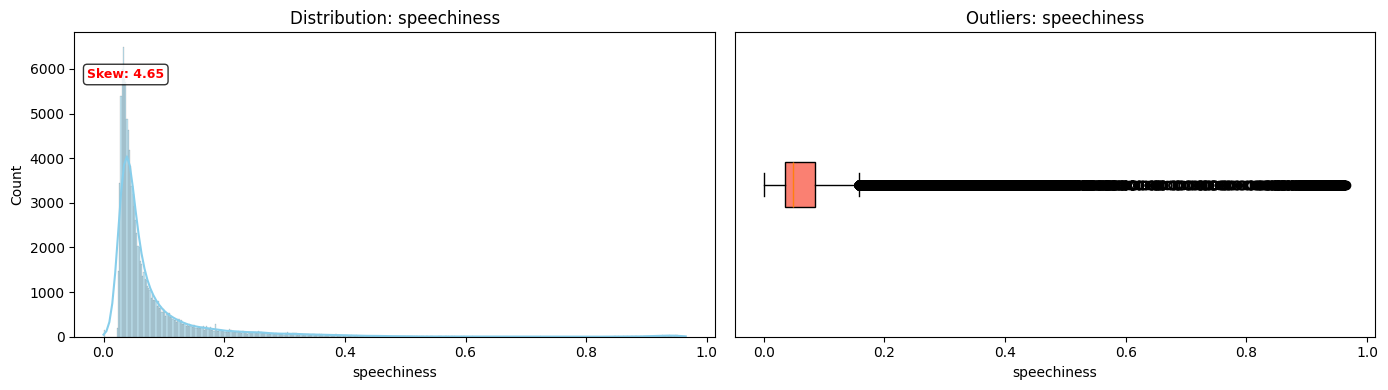

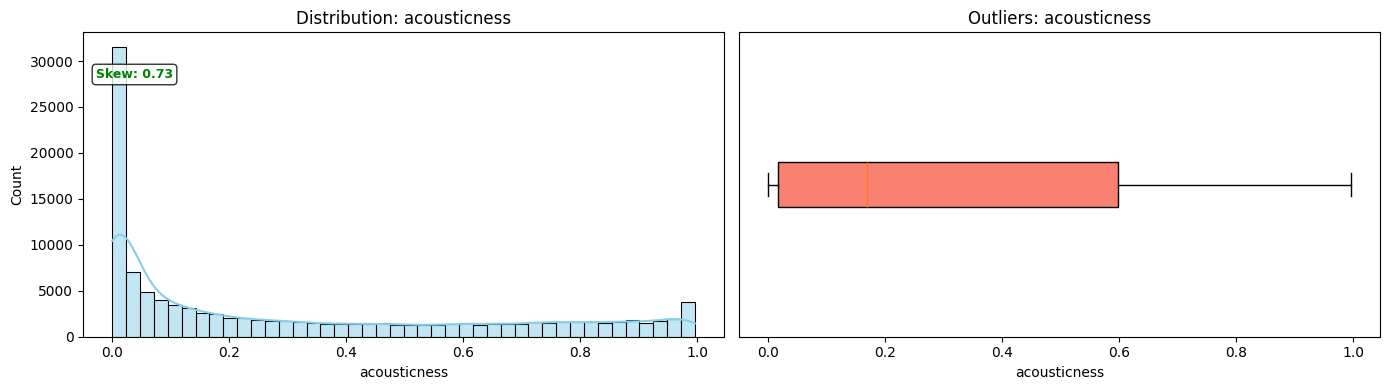

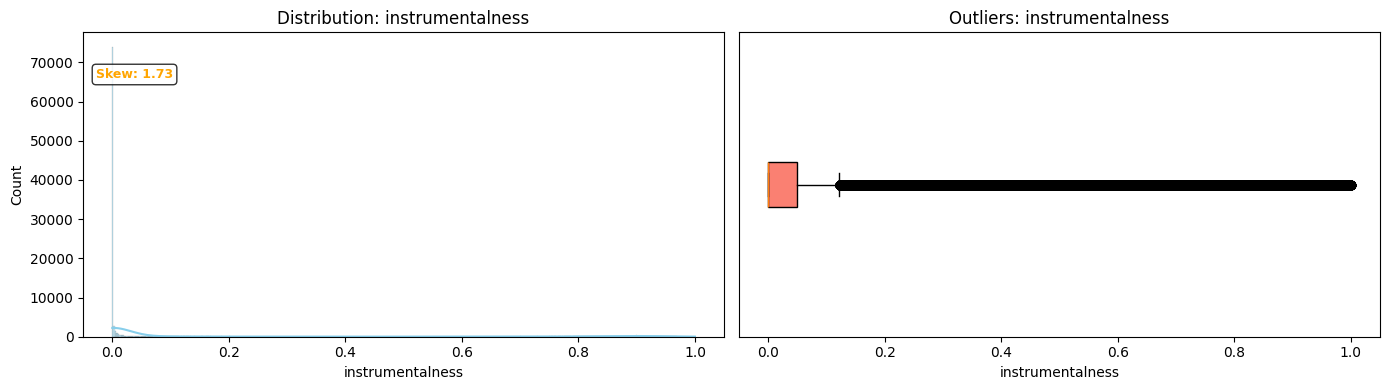

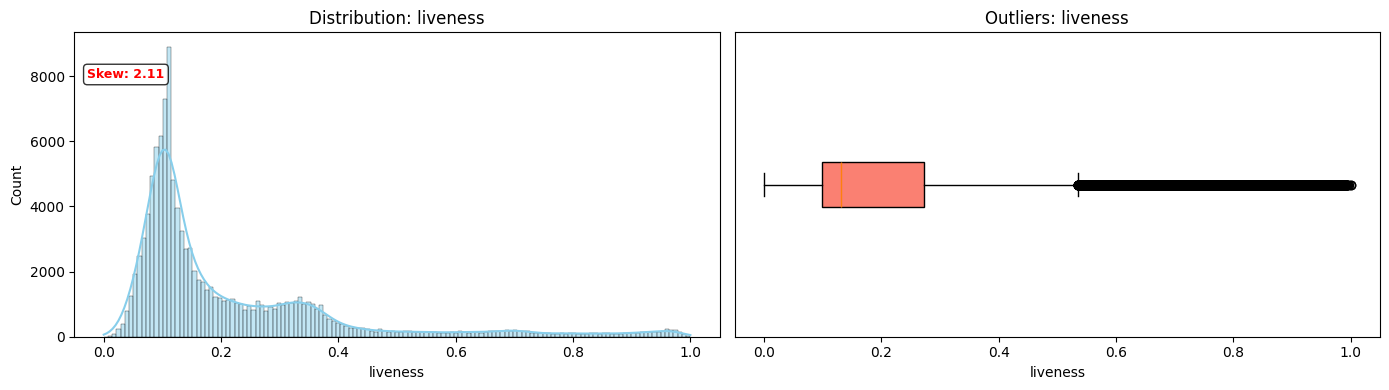

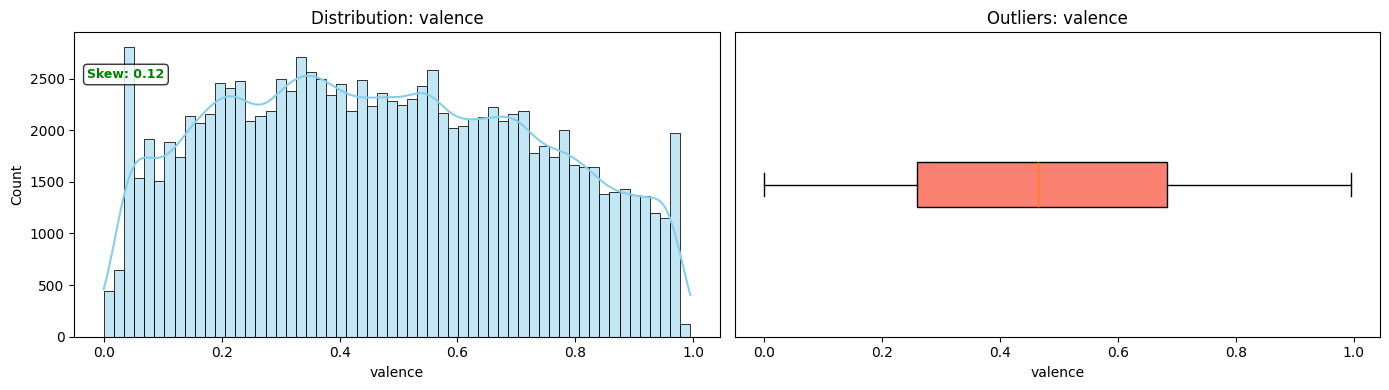

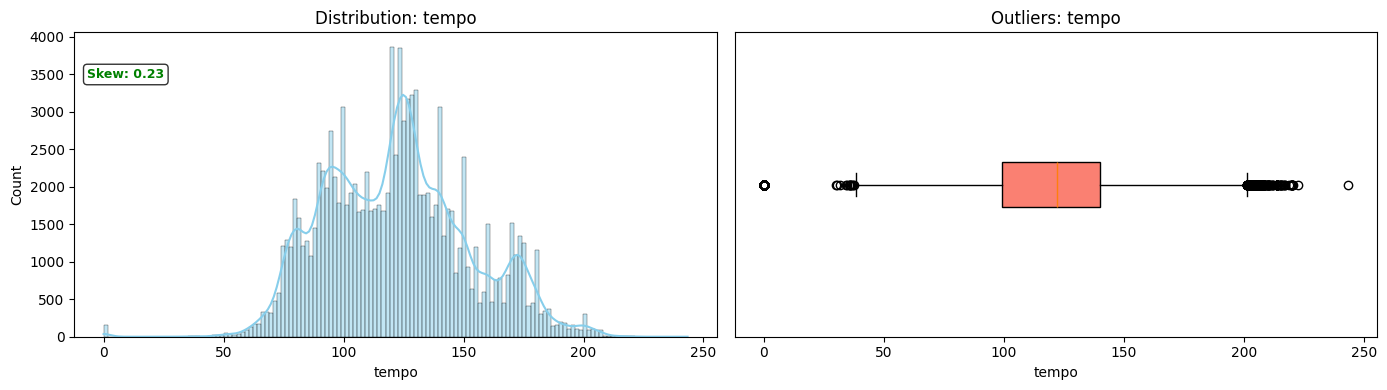

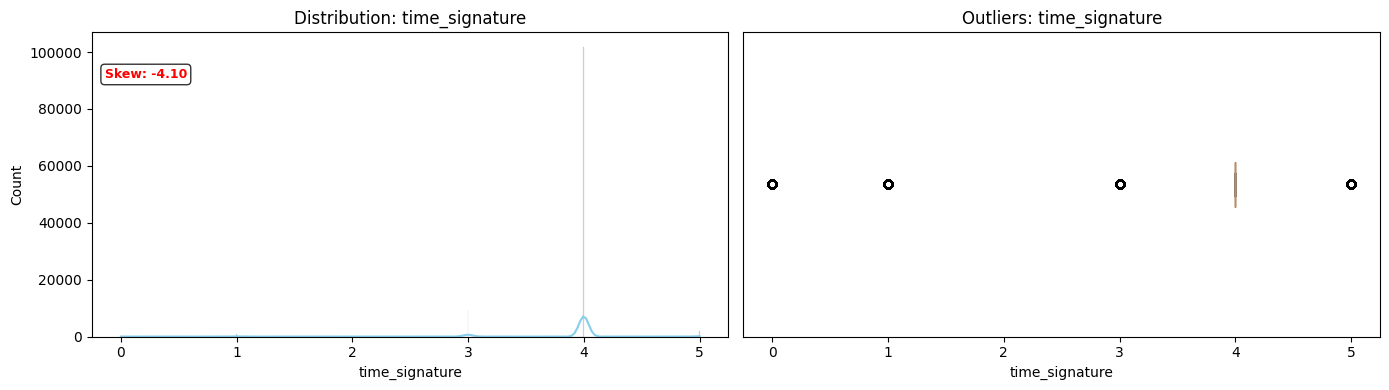

In [19]:
# List of numerical variables to inspect for outliers
# These columns are chosen based on domain knowledge and initial data exploration
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
if 'Unnamed: 0' in numerical_cols:
    numerical_cols.remove('Unnamed: 0')  # Assuming 'id' is a numerical column but not relevant for outlier detection

def plot_outliers(data, columns):
    """
    Generates Boxplots and Histograms.
    Uses Matplotlib for boxplots to have more control over.
    """
    for col in columns:
        fig, axes = plt.subplots(1, 2, figsize=(14, 4))
        
        # Histogram (Seaborn works fine here)
        sns.histplot(data=data, x=col, kde=True, ax=axes[0], color='skyblue')
        axes[0].set_title(f'Distribution: {col}')
        # Add skewness information
        skewness = data[col].skew()
        skew_color = 'green' if abs(skewness) < 1 else 'orange' if abs(skewness) < 2 else 'red'
        axes[0].text(0.02, 0.85, f'Skew: {skewness:.2f}', transform=axes[0].transAxes,
            fontsize=9, color=skew_color, fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        # Boxplot (Matplotlib for simple 1D boxplot)
        # As a best practice, drop NaNs and convert to numpy to be 100% safe
        clean_values = data[col].dropna().values
        
        axes[1].boxplot(clean_values, vert=False, patch_artist=True, 
                        boxprops=dict(facecolor='salmon'))
        axes[1].set_title(f'Outliers: {col}')
        axes[1].set_yticks([]) # Hide y-axis ticks as they are meaningless for 1D boxplot
        axes[1].set_xlabel(col)
        
        plt.tight_layout()
        plt.show()

# Run visualization
print("--- Visualizing Raw Data Distributions ---")
plot_outliers(df_original, numerical_cols)

**Key Findings:**
1.  **Skewness:** Features like `speechiness`, `acousticness`, and `liveness` are heavily right-skewed. May need to consider applying Log Transformation depending on the ML model going to be using.
2.  **Outliers:** `duration_ms` has extreme outliers. Further explore to identofy what those value means. Consider to clip or cap these values (e.g., cap at 99th percentile) to prevent them from distorting clustering.
3.  **Scaling:** `loudness` (negative dB) and `tempo` (BPM) have vastly different scales than `energy` (0-1). Need to consider MinMax Scaling before Clustering.

### Descriptive & Categorical Analysis

In [12]:
# Categorical Data Inspection
# We look for cardinality (number of unique values) to see if One-Hot Encoding is feasible.
cat_cols = ['track_genre', 'key', 'mode', 'time_signature']
print("\n--- Categorical Data Summary ---")
for col in cat_cols:
    unique_count = df_clean[col].nunique()
    print(f"{col}: {unique_count} unique values")
    print(f"  Values: {df_clean[col].unique()}")
    print("---")


--- Categorical Data Summary ---
track_genre: 114 unique values
  Values: ['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-r

### Findings:
- 'track_genre' (114 values) could be too high for One-Hot Encoding. 
- 'key' (12 values) and 'time_signature' (5 values) are perfect for One-Hot Encoding.

---

### Deep Feature Analysis
- Danceability vs Energy
- Feature Correlation Heatmap
- Track duplications

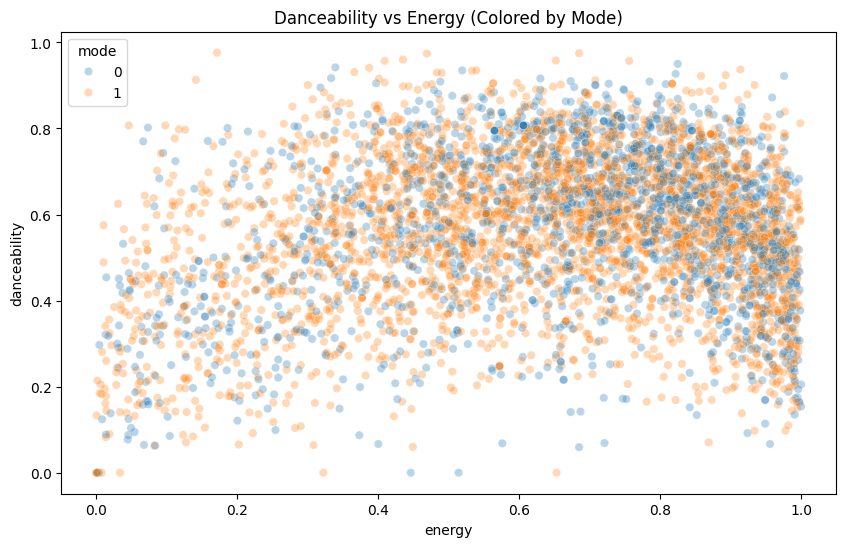

In [13]:
# Danceability vs Energy (The "Vibe" Check)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean.sample(5000), x='energy', y='danceability', alpha=0.3, hue='mode')
plt.title('Danceability vs Energy (Colored by Mode)')
plt.show()

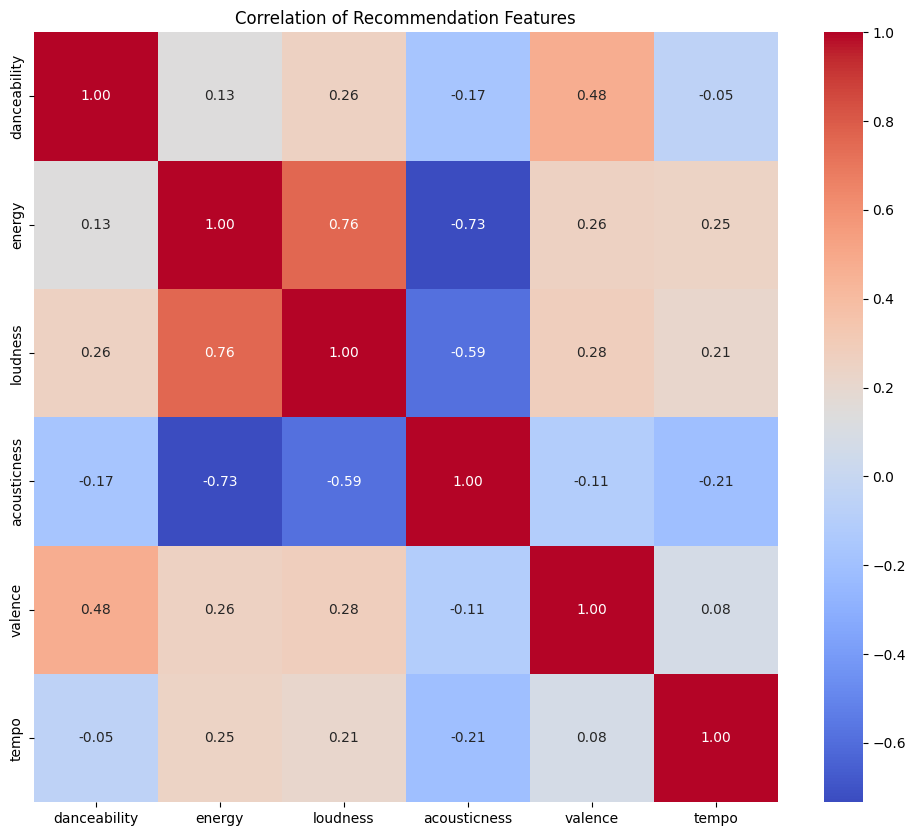

In [14]:
# Feature Correlation Heatmap
# This tells us which features are redundant
plt.figure(figsize=(12, 10))
corr = df_clean[['danceability', 'energy', 'loudness', 'acousticness', 'valence', 'tempo']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Recommendation Features')
plt.show()

### Findings
- Loudness is 76% correlated with energy. Keeping both confuses K-Means. So, consider using energy only.
- Filter speechiness: Recommendation systems for music may behave strabnegly if they accidentally recommend a track that is not a song. Removing speechiness > 0.66 could prevents this.
- One-Hot Encode key: It is a categorical musical property (C major vs F# minor), not a number.

In [15]:

# Define how to aggregate different columns
agg_rules = {
    'danceability': 'mean',    # Audio features: Average them
    'energy': 'mean',
    'track_genre': lambda x: list(set(x)), # Genres: Keep all unique genres as a list
    'album_name': 'count',     # Count albums (popularity proxy)
    'track_id': 'first'        # Keep one ID to play the song
}

# Group by the Song Identity
df_canonical = df_clean.groupby(['track_name', 'artists']).agg(agg_rules).reset_index()
df_canonical = df_canonical[df_canonical['album_name'] > 1]  # Keep only songs with more than 1 album appearance
print(f"Canonical Dataset Shape: {df_canonical.shape}")
df_canonical_renamed = df_canonical.rename(columns={'album_name': 'album_count'})
print(f"Canonical Dataset Length: {len(df_canonical_renamed)}")
print(f"Min : {df_canonical_renamed['album_count'].min()} Max : {df_canonical_renamed['album_count'].max()}")
# Final Summary
print(df_canonical_renamed.head(1))

Canonical Dataset Shape: (16501, 7)
Canonical Dataset Length: 16501
Min : 2 Max : 151
                           track_name          artists  danceability  energy  \
7  "Don Carlos" Roderigo'S Death Aria  Nikolay Kopylov         0.167   0.332   

  track_genre  album_count                track_id  
7   [romance]            2  3KKk48f33mlB56F5L5nbJk  


### Findings
- Need to decide on keeping or addressing duplicates. It can impact clustering and similarity search.
- One option is to Create a "Master Track List" (Canonicalize).
- Aggregation: If a song is in multiple albums with different genres, with aggregation Master Track has the info without losing.



---

### Data Cleaning based on findings

Before analysis, we must address quality issues found in the descriptive stats:
1.  **Duration Errors:** 
- Tracks with `duration_ms` near 0 are invalid. We will remove tracks shorter than 60 seconds.
- **Hard Cap at 20 Minutes (1,200,000 ms):**
    * **Reasoning:** Extremely few individual "songs" exceed 20 minutes. Entries above this threshold are statistically likely to be Podcasts, DJ Sets, or entire Albums uploaded as a single track.
    * **Action:** Delete all rows where `duration_ms > 1,200,000`.

- **Soft Cap (10–20 Minutes):**
    * **Reasoning:** A 12-minute song is normal for some genres but highly suspicious for others.
    * **Action:**
        * **KEEP** if the genre is known for extended play: `classical`, `opera`, `techno`, `house`, `ambient`, `world-music`, `metal`, `psych-rock`.
        * **DROP** if the genre typically features short tracks: `pop`, `comedy`, `country`, `punk`. (e.g., A 15-minute Punk song is likely an error or mislabeled content).
2.  **Non-Music Content:** High `speechiness` (> 0.66) indicates podcasts or comedy, which we want to exclude from a *music* recommender. And identified obvious not song genres. 
3.  **Outliers:** We will cap `duration_ms` at the 99th percentile to prevent extreme outliers (e.g., 90-minute files) from distorting our clusters.
4. **Tempo:** Remove rows where Tempo is 0 (Beat detection failed)
5. **Loudness:** Address Loudness Outliers. "Clip" positive values to 0 dB to prevent them from skewing the scaler.  use .clip(upper=0) which turns +4.5 into 0.0, but leaves -5.0 alone.

Cleaned Shape: (109607, 21)


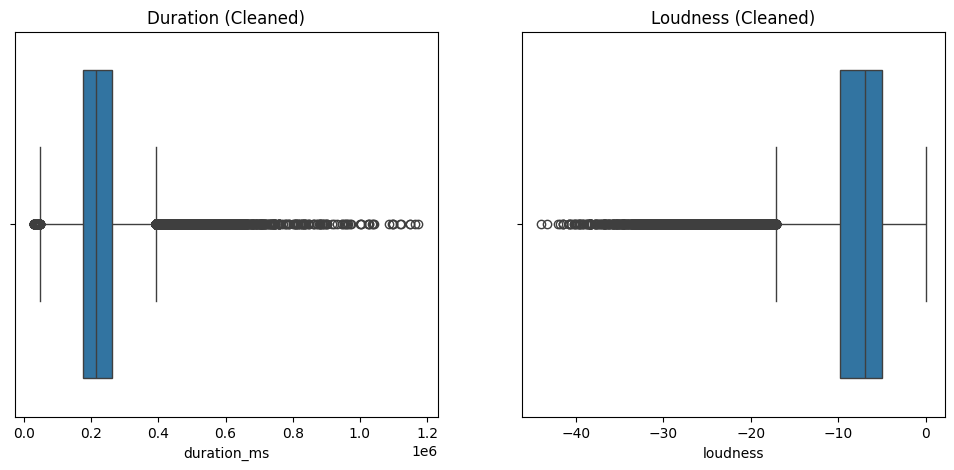

In [6]:
# Filter Technical Errors & Non-Music

# The "Smart Cap" Strategy for filetering song durations upper limits
# Define long song genres where long durations are normal
long_song_genres = [
    'classical', 'opera', 'detroit-techno', 'minimal-techno', 'techno', 
    'chicago-house', 'ambient', 'new-age', 'black-metal', 'psych-rock', 
    'world-music', 'gospel', 'iranian', 'post-rock', 'progressive-house'
]
# Define the logic
def is_valid_duration(row):
    # Rule 1: Remove extreme outliers (> 20 mins)
    if row['duration_ms'] > 1200000: 
        return False
    # Rule 2: If > 10 mins, check if it belongs to a "Long Genre"
    if row['duration_ms'] > 600000:
        if row['track_genre'] in long_song_genres:
            return True # Keep it (It's likely a valid long song)
        else:
            return False # Drop it (A 12-min Pop song is likely an error/interview)       
    return True # Keep everything under 10 mins

# List of genres to drop
non_music_genres = ['comedy', 'sleep', 'children', 'kids']

# Keep songs > 30s and < "Smart Cap" Strategy
# Keep songs with Tempo > 0
# Keep songs with Speechiness < 0.66 (Music only)
# Drop Non-Music based on Genre
# Remove rows where Tempo is 0 (Beat detection failed
df_cleaned = df_clean[
    (df_clean['duration_ms'] > 30000) &                 
    (df_clean.apply(is_valid_duration, axis=1)) &       
    (df_clean['tempo'] > 0) &
    (df_clean['speechiness'] < 0.66) &
    (~df_clean['track_genre'].isin(non_music_genres)) &
    (df_clean['tempo'] > 0) # Remove rows where Tempo is 0 (Beat detection failed)
].copy()


# "Clip" positive values to 0 dB to prevent them from skewing the scaler
df_cleaned['loudness'] = df_cleaned['loudness'].clip(upper=0)

print(f"Cleaned Shape: {df_cleaned.shape}")

# Visualize Outliers AFTER cleaning
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df_cleaned['duration_ms'])
plt.title('Duration (Cleaned)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned['loudness'])
plt.title('Loudness (Cleaned)')
plt.show()

### Further cleaning recomendations on findings (not executed)
- Recommendation: When cleaning or scaling duration_ms, consider normalizing it relative to the genre (e.g., "This song is long for a Pop song") rather than globally.
- Ex: A 7-minute song is an outlier for a "Pop" listener (who expects 3 minutes) and A 7-minute song is normal for a "Techno" listener.

---

### Set Data Types

In [7]:
# Set data types
df_cleaned['key'] = df_cleaned['key'].astype('category')
df_cleaned['mode'] = df_cleaned['mode'].astype('category')
df_cleaned['time_signature'] = df_cleaned['time_signature'].astype('category')
df_cleaned['track_genre'] = df_cleaned['track_genre'].astype('category')

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109607 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Unnamed: 0        109607 non-null  int64   
 1   track_id          109607 non-null  object  
 2   artists           109607 non-null  object  
 3   album_name        109607 non-null  object  
 4   track_name        109607 non-null  object  
 5   popularity        109607 non-null  int64   
 6   duration_ms       109607 non-null  int64   
 7   explicit          109607 non-null  bool    
 8   danceability      109607 non-null  float64 
 9   energy            109607 non-null  float64 
 10  key               109607 non-null  category
 11  loudness          109607 non-null  float64 
 12  mode              109607 non-null  category
 13  speechiness       109607 non-null  float64 
 14  acousticness      109607 non-null  float64 
 15  instrumentalness  109607 non-null  float64 
 16  livenes

---

## Hypothesis Testing
We will now test two specific hypotheses related to music trends.

- **Visualise popular songs by genre and time:** Two hypothesis will be tested for genre and time (duration_ms)
- **Identify trends in music preferences across different demographics:** The dataset does not contain user demographic data (e.g., Age, Gender, Location, User ID).


### Hypothesis 1: Genre Popularity
* **Hypothesis 1:** All genres have the same average popularity, music preference is evenly distributed.
* **Selected Test:** **Mann-Whitney U Test** comparing the distribution of the Top 10 vs. Bottom 10 genres (Non-parametric independent test).
* **Why?** Since the data is skewed and not normal, the standard T-Test would be invalid. Mann-Whitney U compares the rank sums, making it robust to outliers.
* **Visual:** Box Plot comparison.


--- HYPOTHESIS 1: GENRE TRENDS ---
Top 10 Genres (Mainstream Proxy): ['pop-film', 'k-pop', 'chill', 'sad', 'grunge', 'indian', 'anime', 'emo', 'sertanejo', 'pop']
Bottom 10 Genres (Niche Proxy): ['honky-tonk', 'idm', 'grindcore', 'jazz', 'classical', 'chicago-house', 'detroit-techno', 'latin', 'romance', 'iranian']

Mann-Whitney U Test (Top vs Bottom Group): Statistic=91425631.50, p-value=0.00e+00


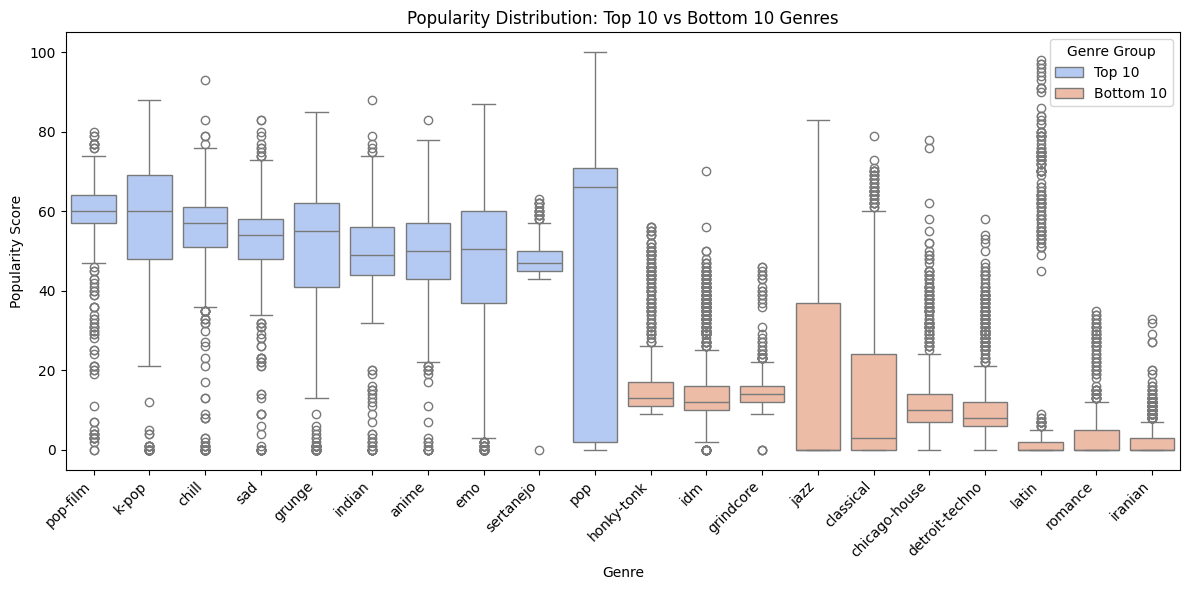

In [ ]:
print("--- HYPOTHESIS 1: GENRE TRENDS ---")

# 1. Identify "Mainstream" (Top) and "Niche" (Bottom) genres based on data
genre_ranking = df_cleaned.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)
top_10_genres = genre_ranking.head(10).index.tolist()
bottom_10_genres = genre_ranking.tail(10).index.tolist()

print(f"Top 10 Genres (Mainstream Proxy): {top_10_genres}")
print(f"Bottom 10 Genres (Niche Proxy): {bottom_10_genres}")

# 2. Filter data for these genres only
df_top = df_cleaned[df_cleaned['track_genre'].isin(top_10_genres)].assign(Group='Top 10')
df_bottom = df_cleaned[df_cleaned['track_genre'].isin(bottom_10_genres)].assign(Group='Bottom 10')
df_h1 = pd.concat([df_top, df_bottom])

# 3. Statistical Test: Mann-Whitney U Test
stat_h1, p_h1 = stats.mannwhitneyu(df_top['popularity'], df_bottom['popularity'])
print(f"\nMann-Whitney U Test (Top vs Bottom Group): Statistic={stat_h1:.2f}, p-value={p_h1:.2e}")

# Create a specific list to enforce the X-axis order (Top 10 first, then Bottom 10)
x_axis_order = top_10_genres + bottom_10_genres

# 4. Visualization: Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_h1, 
    x='track_genre', 
    y='popularity', 
    hue='Group', 
    dodge=False, 
    palette='coolwarm',
    order=x_axis_order
)

plt.title('Popularity Distribution: Top 10 vs Bottom 10 Genres')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('Popularity Score')
plt.legend(title='Genre Group')
plt.tight_layout()
plt.show()

**Genre Trends Outcome:**
* **Result:** The P-value is effectively 0.0 ($< 0.05$).
* **Conclusion:** The result is **Statistically Significant**. We can confirm with near-certainty that the popularity gap between Mainstream and Niche genres is real, with Mainstream genres scoring ~40 points higher on average.
* **Conclusion:** There is a massive popularity gap. "Mainstream" genres like *Pop-Film* and *K-Pop* consistently score 40-50 points higher than "Niche" genres.
* **Rationale Validation:** The **Box Plot** successfully highlights this disparity. While top genres have high medians and compact distributions (consistent hits), bottom genres often have medians near 0 (mostly unknown tracks).

### Hypothesis 2: Duration vs. Popularity
* **Hypothesis 2:** Duration *does not* impact popularity.
* **Selected Test:** **Kruskal-Wallis H Test**  comparing popularity across 5 duration bins (Non-parametric ANOVA).
* **Why?** With non-normal data across >2 groups, One-Way ANOVA is inappropriate. Kruskal-Wallis tests if at least one group dominates the others.
* **Visual:** Hexbin Density Plot and Binned Bar Chart.


--- RESULTS: DURATION SWEET SPOT ---
Kruskal-Wallis Test: Statistic=742.67, P-Value=2.00e-159


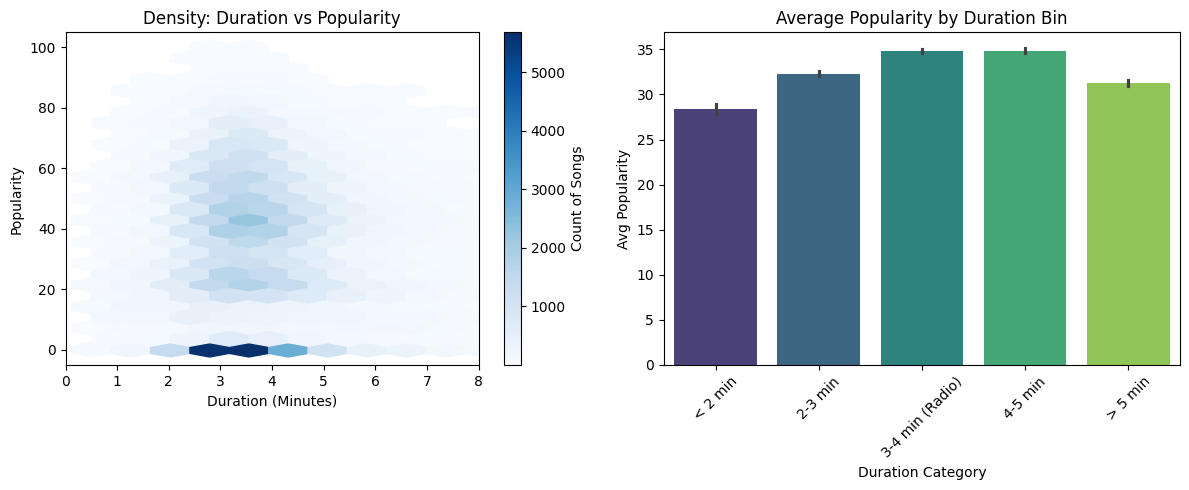

In [ ]:
# ==========================================
# Duration Sweet Spot
# ==========================================
print("\n--- RESULTS: DURATION SWEET SPOT ---")

# 1. Feature Engineering: Minutes & Bins
df_cleaned['duration_min'] = df_cleaned['duration_ms'] / 60000
bins = [0, 2, 3, 4, 5, 20]
labels = ['< 2 min', '2-3 min', '3-4 min (Radio)', '4-5 min', '> 5 min']
df_cleaned['duration_bin'] = pd.cut(df_cleaned['duration_min'], bins=bins, labels=labels)

# 2. Statistical Test: Kruskal-Wallis
# Comparing popularity distributions across the 5 bins
groups = [df_cleaned[df_cleaned['duration_bin'] == label]['popularity'] for label in labels]
stat_h2, p_h2 = stats.kruskal(*groups)
print(f"Kruskal-Wallis Test: Statistic={stat_h2:.2f}, P-Value={p_h2:.2e}")

# 3. Visualization A: Hexbin Plot (Global Density)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hexbin(df_cleaned['duration_min'], df_cleaned['popularity'], gridsize=25, cmap='Blues', mincnt=1)
plt.colorbar(label='Count of Songs')
plt.title('Density: Duration vs Popularity')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Popularity')
plt.xlim(0, 8) # Focus on the main cluster

# 4. Visualization B: Bar Chart (Binned Trends)
plt.subplot(1, 2, 2)
sns.barplot(data=df_cleaned, x='duration_bin', y='popularity', palette='viridis', errorbar=('ci', 95))
plt.title('Average Popularity by Duration Bin')
plt.xlabel('Duration Category')
plt.ylabel('Avg Popularity')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Duration Outcome:**
* **Result:** The P-value is effectively 0.0 ($< 0.05$).
* **Conclusion:** Duration *does* impact popularity.
* **Insight:** The **Bar Chart** confirms Duration *does* impact popularity: songs in the **3-4 minute** and **2-3 minute** buckets have the highest average popularity. Very short (<2m) and very long (>5m) songs see a statistically significant drop in popularity.
* **Rationale Validation:** The **Hexbin Plot** reveals that the "sweet spot" is a dense cluster between 2.5 and 4.0 minutes.

---

## LOADING DATA
Load the data into CSV to cleaned_house_data.csv  and parquet

In [ ]:
print("=== LOADING DATA ===")

try:
  # Data directory paths
  data_path = os.path.join("..","data","processed")
  # Load cleaned dataset
  df_cleaned.to_csv(os.path.join(data_path, "cleaned_spotify_dataset.csv"), index=False)
  df_cleaned.to_parquet(os.path.join(data_path, "cleaned_spotify_dataset.parquet"), index=False)
except Exception as e:
  print(e)

print(f"Data saved to {os.path.join(data_path,'cleaned_spotify_dataset as csv and parquet files')}")

=== LOADING DATA ===
Data saved to ..\data\processed\cleaned_spotify_dataset as csv and parquet files


---

# Conclusion & Next Steps

1.  **Skewness:** Features like `speechiness`, `acousticness`, and `liveness` are heavily right-skewed. **Action:** Consider applying Log Transformation depending on the modlel section.
2.  **Scaling:** `loudness` (negative dB) and `tempo` (BPM) have vastly different scales than `energy` (0-1). **Action:** MinMax Scaling could improve the accuracy before Clustering.
3.  **Genre Imbalance:** Some genres are vastly more popular. **Action:** No action needed as for clustering, this natural imbalance is acceptable.

**Next Notebook:** Feature Engineering.

---
<style>
.noborder td, .noborder th, .noborder table {
    border: none !important;
}
</style>

<table class="noborder" style="width:100%; border-collapse:collapse;">
  <tr>
    <td style="text-align:left; width:33%;">
    </td>
    <td style="text-align:center; width:33%;">01</td>
    <td style="text-align:right; width:33%;">
      <a href="./02_clustering.ipynb" title="Clustering">Next &gt;</a>
    </td>
  </tr>
</table>
<p style="text-align:center;">
  <a href="#top">⬆ Back to top</a>
</p>